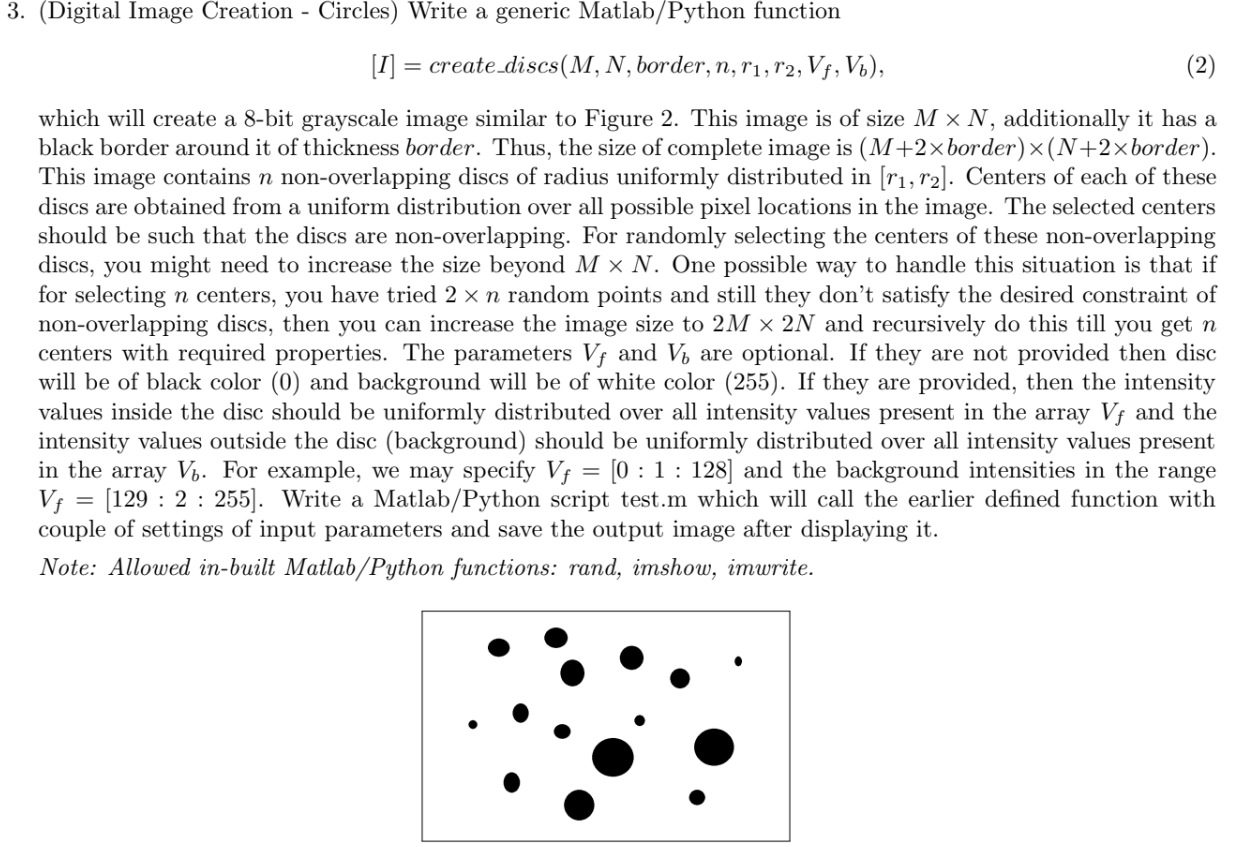

In [1]:
import numpy as np
import random
import sys
# This is a helper function to assign the pixels of the circle with pixel intensity value = 0
# This function will be called by the main function when Vb is None
# It takes image , centre of a circle and radius as the arguement
def draw_c1(image, x_cor,y_cor,radius): 
# Check the pixels which are lying inside  the circle
    for i in range(x_cor - radius, x_cor + radius + 1): 
        for j in range(y_cor - radius, y_cor + radius + 1):
# Color all the pixels whose distance satisfies the below condition
            if (i - x_cor)**2 + (j - y_cor)**2 <= radius**2: 
# Assign black color to such pixels
              image[i, j] = 0

# This is a helper function to assign the pixels of circle witht pixel intensity 
# distributed uniformly over range indicated by vf
# This function is called when Vb is not None

def draw_c2(image, x_cor,y_cor,radius,vf):
# Check the pixels which are lying inside  the circle
    for i in range(x_cor - radius, x_cor + radius + 1):
        for j in range(y_cor - radius, y_cor + radius + 1):
# Color all the pixels whose distance satisfies the below condition
            if (i - x_cor)**2 + (j - y_cor)**2 <= radius**2:
# Assign random pixel intensity value which are uniformly distributed ober the range vf
              image[i, j] = np.random.choice(vf)

# This is a helper function to find euclidean distance between two points , point1 and point2
def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) 

# This is a helper function to check if the new circle which is generated does not overlap with any other circles which have been 
# generated so far
# It takes the new circle denoted by circle , all other circles denoted by circles , and radius of the new circle denoted by r1
def check_overlap(circle, circles, r1):
    for other in circles:
#check if the distance between the center of the new circle and centers of every other circles present in circles is less than sum of  radius 
# of the new circle and the corresponding radius of  other circles
        if (euclidean_distance(circle[0], other[0]))  <= (r1  + other[1])**2 :
# If it is less , than there is an overlap
            return True
    return False


def create_discs(M, N, border, n, r1, r2, Vf=None, Vb=None):
  # check if the arguements given are correct 
    if M <= 0 or N <= 0 or border < 0 or n <= 0 or r1 <= 0 or r2 <= 0 or r1 > r2:
      print("Arguements are invalid ")
      sys.exit(1)
    if r1>M or r1 > N or r2 > M or r2 > N :
      print("Arguements are invalid")
      sys.exit(1)
# Initialie an image of size M + 2*border, N + 2*border with all pixel value set to 0
    image = np.zeros((M + 2*border, N + 2*border), dtype=np.uint8)
# If Arguement Vb is None , then set all the pixel values to 255
    if Vb is None:
      image = np.ones((M + 2 * border, N + 2 * border)) * 255
    else:
# If Arguement Vb is not None , then set all the pixel values to random pixel value uniformly distributed over the 
# range provided in the arguement Vb 
      for i in range (M + 2*border):
        for j in range( N + 2*border):
          bg = np.random.choice(Vb)
          image[i][j] = bg
# Make the border black
          if i < border or j < border or i>= M + border or j >= N+ border:
            image[i][j] = 0
# Make the border black
    for i in range (M + 2*border):
      for j in range( N + 2*border):
        if i < border or j < border or i>= M + border or j >= N+ border:
          image[i][j] = 0

    centers = [] # This stores the center x , y of all circles
    circles=[]  # This stores center and radius of each circles
    for i in range(2 * n):
        # We are randomly selecting the center of the circle
        x = np.random.randint(r1 + border, M + border - r1 )
        y = np.random.randint(r1 + border, N + border - r1 )
        # We are randomly selecting the radius uniformly distributed over r1 and r2
        radius = np.random.randint(r1 , r2+1)
        #  We are checking if the circle touches the border 
        while (x - radius < border) or (x + radius >= M + border) or (y - radius < border) or (y + radius >= N + border):
        # We continue till we find circle which does not touch the border
            radius = np.random.randint(r1, r2+1)
        center = (x, y)
        circle = [center , radius]
        
        # we check the overlapping condition over the circle generated

        if len(centers) == 0:
            centers.append(center)
            circles.append(circle)
        else:
          # Call helper function discussed above to check the overlapping conditon
          overlap = False
          if(check_overlap(circle,circles,radius)):
            overlap = True
          # If the circle does not overlap with any other existing circle , then add it into the circles and centers
          if not overlap:
              centers.append(center)
              circles.append(circle)
          # We run the loop for max 2 * n times where n is the number of circles we want
          # If we get enough number of circles , then break
        if len(centers) == n:
            break
    # If we couldn't find enough circle , we use recursive approach as discussed in the problem statement and in class
    if len(centers) < n:
      print('insufficient image space ,hence trying for 2M * 2N image size')
      return create_discs(2 * M, 2 * N, border, n, r1, r2, Vf, Vb)
    # Now we call helper functions discussed above to color the pixels
    for circ in circles:
        x_cor = circ[0][0]
        y_cor = circ[0][1]
        r_cor = circ[1]
        if Vf is None:
# call first helper function
          draw_c1(image ,x_cor,y_cor,r_cor)
        else:
# call second helper function
          draw_c2(image ,x_cor,y_cor,r_cor,Vf)
# return the final image
    return image


Test 1

insufficient image space ,hence trying for 2M * 2N image size


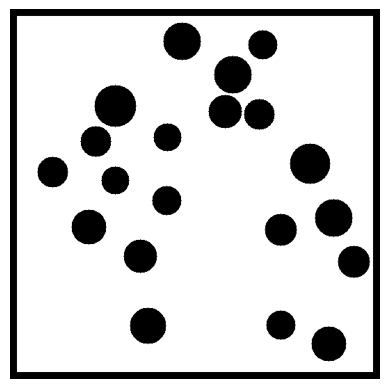

In [3]:
import matplotlib.pyplot as plt

# Create the image 
# The arguements should be given in the format def create_discs(M, N, border, n, r1, r2, Vf=None, Vb=None):
# Here M and N are the dimensions , border indicates the width of black borde
# We initially try to create 20 images with radius lying in range 20 and 30 
# Vf and Vb are kept none , so we get a black and white image
image = create_discs(256,256,10,20,20, 30,None ,None)
# Display and save the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()
plt.imsave('image1.png', image, cmap='gray')
# In this case initial image dimensions did not suffice, so the image size is doubled as it can be clearly seen in the out put

Test 2 

insufficient image space ,hence trying for 2M * 2N image size
insufficient image space ,hence trying for 2M * 2N image size


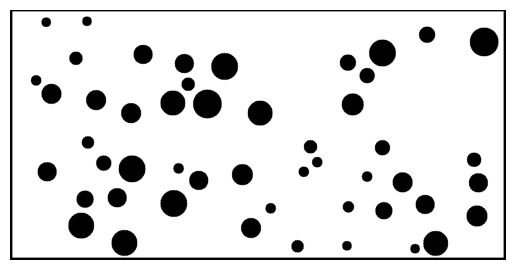

In [6]:
import matplotlib.pyplot as plt

# Create a rectangle image with 50 circles in it 

image = create_discs(128,256,5,50,10, 30,None ,None)
# The circles may seem overlapping , but on sooming in , the separation can be easily seen
# Display and save the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()
plt.imsave('image2.png', image, cmap='gray')

Test 3

insufficient image space ,hence trying for 2M * 2N image size
insufficient image space ,hence trying for 2M * 2N image size


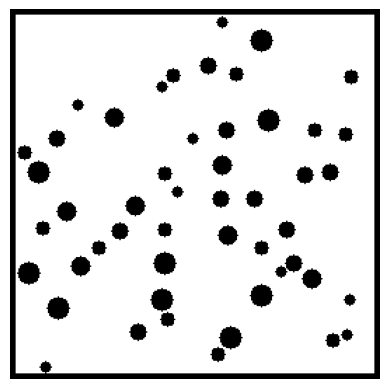

In [7]:
import matplotlib.pyplot as plt

# Create the image
# On decreasing the image dimension , we find that he circles are not perfect 
# This finding is true in the sense , the circles are pixelated
image = create_discs(64,64,4,50,4, 8,None ,None)
# Display and save the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()
plt.imsave('image3.png', image, cmap='gray')

Test 5 High resolution image generation

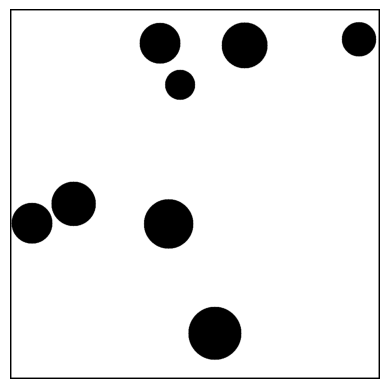

In [8]:
import matplotlib.pyplot as plt

# Create the image
# Set the M and N to get high resolution image
# Finding - The circle we get is very smooth
image = create_discs(1024,1024,4,8,40, 80,None ,None)
# Display and save the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()
plt.imsave('image5.png', image, cmap='gray')

Test 6 When Vf is not None and Vb is not None

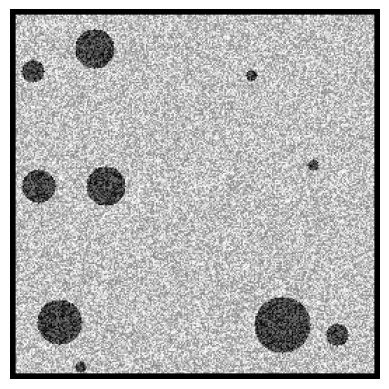

In [9]:
import matplotlib.pyplot as plt
# The generation takes some time in this case 
# Create the image
image = create_discs(256,256,4,10,4, 20,range(0,128,1) ,range(129,255,2))
# Display and save the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()
plt.imsave('image6.png', image, cmap='gray')

Test 7 We increase number of circles

insufficient image space ,hence trying for 2M * 2N image size


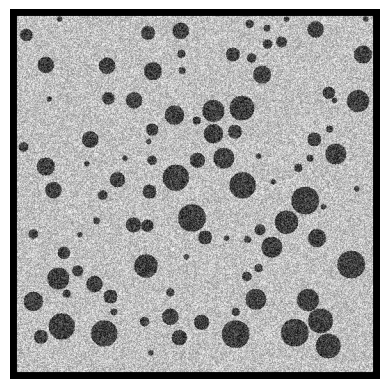

In [11]:
import matplotlib.pyplot as plt
# This takes some time(16 seconds) ,please have patience
# Create the image
image = create_discs(256,256,10,100,4,20,range(0,128,1) ,range(128,256,2))
# Display and save the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()
plt.imsave('image7.png', image, cmap='gray')

Test 8 Increase the dimension

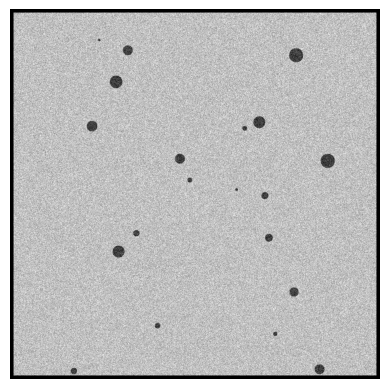

In [12]:
import matplotlib.pyplot as plt
# This takes some time(33  seconds) ,please have patience
# Create the image
# Finding - The circles are very smooth 
# You may confuse two circles in the bottom touching the border , but 
# once zoomed in we clearly see the gap
image = create_discs(1024,1024,10,20,4,20,range(0,128,1) ,range(128,256,2))
# Display and save the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()
plt.imsave('image8.png', image, cmap='gray')

Test 9 Increase the circles

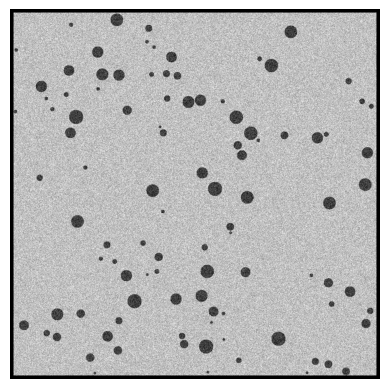

In [13]:
import matplotlib.pyplot as plt
# This takes some time(34  seconds) ,please have patience , the results are amazing , black beads on white background
# Create the image
# Finding - The circles are very smooth 
# You may confuse that circles are overlapping or touching borders , but 
# once zoomed in we clearly see the gap
image = create_discs(1024,1024,10,100,4,20,range(0,128,1) ,range(128,256,2))
# Display and save the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()
plt.imsave('image9.png', image, cmap='gray')

We find these tests are enough , you may kindly create your own tests